# SVM - NSL

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix,f1_score

In [3]:
def load_train_dataset():
    df_train = pd.read_csv('NSL_train-set.csv')

    limit = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit]
    Y_train = df_train.iloc[:,limit]
    
    return X_train, Y_train, df_train

X_train, Y_train, df_train = load_train_dataset()

In [4]:
def load_test_dataset():
    df_test = pd.read_csv('NSL_test-set.csv')

    limit = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit]
    Y_test = df_test.iloc[:,limit]
    
    return X_test, Y_test, df_test

X_test, Y_test, df_test = load_test_dataset()

In [5]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.2,stratify = Y_train,
                                                    shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (91459, 77)
Validation X : (22865, 77)
Test_X       : (22514, 77)
Training_Y   : (91459,)
Validation Y : (22865,)
Test_Y       : (22514,)


In [17]:
model = SVC(C= 49.5, gamma= 0.901).fit(X_train,Y_train)

In [19]:
model_poly = SVC(C= 2.5, kernel= 'poly',degree=4,gamma=0.501).fit(X_train,Y_train)

## RBF Kernel Pipeline

In [18]:
test_predictions = model.predict(X_test)

print('RBF Kernel')
print("Cross-Validation set accuracy: {:.4f} %".format((cross_val_score(model, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.4f} %".format(model.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions)*100))

RBF Kernel
Cross-Validation set accuracy: 99.4358 %
Train set accuracy           : 99.8032 %
Test set accuracy            : 80.0036 %


In [9]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

Test set precision : 0.9286
Test set recall    : 0.7125
Test set F1-score  : 0.8063


## Poly Kernel Pipeline

In [20]:
test_predictions_poly = model_poly.predict(X_test)

print('Poly Kernel')
print("Cross-Validation set accuracy: {:.4f} %".format((cross_val_score(model_poly, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.4f} %".format(model_poly.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions_poly)*100))

Poly Kernel
Cross-Validation set accuracy: 99.4752 %
Train set accuracy           : 99.7813 %
Test set accuracy            : 82.7307 %


In [21]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions_poly)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions_poly)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions_poly)))

Test set precision : 0.9335
Test set recall    : 0.7497
Test set F1-score  : 0.8316


True Negatives  : 0.93
False Positives : 0.07
False Negatives : 0.30
True Positives  : 0.70
True Negatives  : 0.93
False Positives : 0.07
False Negatives : 0.25
True Positives  : 0.75


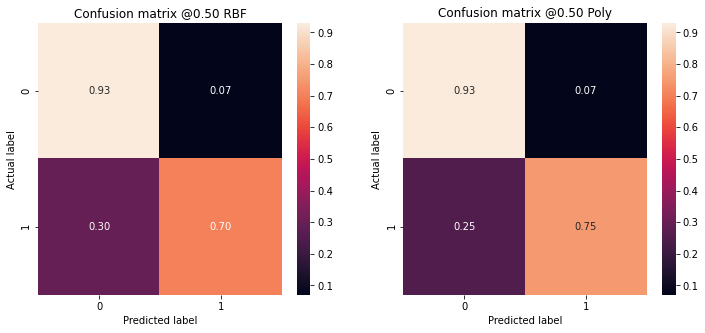

In [22]:
predictions = [test_predictions,test_predictions_poly]
kernel_names = ['RBF','Poly']

def plot_cm(labels, predictions,kernel_names, p=0.5):
    fig, axs = plt.subplots(nrows = 1,ncols = 2, figsize=(12, 5))
    for i in range(0,2): 
        pred = predictions[i]
        k_names = kernel_names[i]
        cm = confusion_matrix(labels, pred > p, normalize= 'true')
        sns.heatmap(cm, annot=True, fmt=".2f",ax=axs[i])
        axs[i].set(xlabel='Predicted label',ylabel='Actual label',
                   title=str('Confusion matrix @{:.2f}'.format(p))+' '+ str(k_names))
        
        print('True Negatives  : {:.2f}'.format(cm[0][0]))
        print('False Positives : {:.2f}'.format(cm[0][1]))
        print('False Negatives : {:.2f}'.format(cm[1][0]))
        print('True Positives  : {:.2f}'.format(cm[1][1]))
        
plot_cm(Y_test, predictions,kernel_names)

In [23]:
print('RBF Kernel Classification Report')
print(classification_report(Y_test, test_predictions))
print('\n')
print('Poly Kernel Classification Report')
print(classification_report(Y_test, test_predictions_poly))

RBF Kernel Classification Report
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      9711
           1       0.93      0.70      0.80     12803

    accuracy                           0.80     22514
   macro avg       0.82      0.82      0.80     22514
weighted avg       0.83      0.80      0.80     22514



Poly Kernel Classification Report
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      9711
           1       0.93      0.75      0.83     12803

    accuracy                           0.83     22514
   macro avg       0.84      0.84      0.83     22514
weighted avg       0.85      0.83      0.83     22514



In [14]:
param_grid = [
    {'gamma' : np.arange(0.001,1,0.1).tolist(),
     'C' : np.arange(0.5,50.0,0.5).tolist()},]

optimal_params = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring ='accuracy',
    cv=2,
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 2 folds for each of 990 candidates, totalling 1980 fits
[CV] C=0.5, gamma=0.001 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.5, gamma=0.001, total=  11.9s
[CV] C=0.5, gamma=0.001 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s


[CV] ............................... C=0.5, gamma=0.001, total=  12.3s
[CV] C=0.5, gamma=0.101 ..............................................
[CV] ............................... C=0.5, gamma=0.101, total=   3.4s
[CV] C=0.5, gamma=0.101 ..............................................
[CV] ............................... C=0.5, gamma=0.101, total=   3.0s
[CV] C=0.5, gamma=0.201 ..............................................
[CV] ............................... C=0.5, gamma=0.201, total=   2.8s
[CV] C=0.5, gamma=0.201 ..............................................
[CV] ............................... C=0.5, gamma=0.201, total=   2.7s
[CV] C=0.5, gamma=0.30100000000000005 ................................
[CV] ................. C=0.5, gamma=0.30100000000000005, total=   2.8s
[CV] C=0.5, gamma=0.30100000000000005 ................................
[CV] ................. C=0.5, gamma=0.30100000000000005, total=   2.6s
[CV] C=0.5, gamma=0.401 ..............................................
[CV] .

[CV] ............................... C=1.5, gamma=0.901, total=   4.7s
[CV] C=2.0, gamma=0.001 ..............................................
[CV] ............................... C=2.0, gamma=0.001, total=  11.5s
[CV] C=2.0, gamma=0.001 ..............................................
[CV] ............................... C=2.0, gamma=0.001, total=   9.0s
[CV] C=2.0, gamma=0.101 ..............................................
[CV] ............................... C=2.0, gamma=0.101, total=   3.3s
[CV] C=2.0, gamma=0.101 ..............................................
[CV] ............................... C=2.0, gamma=0.101, total=   2.9s
[CV] C=2.0, gamma=0.201 ..............................................
[CV] ............................... C=2.0, gamma=0.201, total=   3.0s
[CV] C=2.0, gamma=0.201 ..............................................
[CV] ............................... C=2.0, gamma=0.201, total=   2.9s
[CV] C=2.0, gamma=0.30100000000000005 ................................
[CV] .

[CV] ............................... C=3.0, gamma=0.801, total=   3.1s
[CV] C=3.0, gamma=0.901 ..............................................
[CV] ............................... C=3.0, gamma=0.901, total=   3.6s
[CV] C=3.0, gamma=0.901 ..............................................
[CV] ............................... C=3.0, gamma=0.901, total=   3.3s
[CV] C=3.5, gamma=0.001 ..............................................
[CV] ............................... C=3.5, gamma=0.001, total=   8.9s
[CV] C=3.5, gamma=0.001 ..............................................
[CV] ............................... C=3.5, gamma=0.001, total=   9.1s
[CV] C=3.5, gamma=0.101 ..............................................
[CV] ............................... C=3.5, gamma=0.101, total=   2.8s
[CV] C=3.5, gamma=0.101 ..............................................
[CV] ............................... C=3.5, gamma=0.101, total=   2.6s
[CV] C=3.5, gamma=0.201 ..............................................
[CV] .

[CV] .................. C=4.5, gamma=0.7010000000000001, total=   3.4s
[CV] C=4.5, gamma=0.801 ..............................................
[CV] ............................... C=4.5, gamma=0.801, total=   3.9s
[CV] C=4.5, gamma=0.801 ..............................................
[CV] ............................... C=4.5, gamma=0.801, total=   3.3s
[CV] C=4.5, gamma=0.901 ..............................................
[CV] ............................... C=4.5, gamma=0.901, total=   3.5s
[CV] C=4.5, gamma=0.901 ..............................................
[CV] ............................... C=4.5, gamma=0.901, total=   3.4s
[CV] C=5.0, gamma=0.001 ..............................................
[CV] ............................... C=5.0, gamma=0.001, total=   8.1s
[CV] C=5.0, gamma=0.001 ..............................................
[CV] ............................... C=5.0, gamma=0.001, total=   8.2s
[CV] C=5.0, gamma=0.101 ..............................................
[CV] .

[CV] .................. C=6.0, gamma=0.6010000000000001, total=   2.5s
[CV] C=6.0, gamma=0.7010000000000001 .................................
[CV] .................. C=6.0, gamma=0.7010000000000001, total=   2.8s
[CV] C=6.0, gamma=0.7010000000000001 .................................
[CV] .................. C=6.0, gamma=0.7010000000000001, total=   2.3s
[CV] C=6.0, gamma=0.801 ..............................................
[CV] ............................... C=6.0, gamma=0.801, total=   3.0s
[CV] C=6.0, gamma=0.801 ..............................................
[CV] ............................... C=6.0, gamma=0.801, total=   3.3s
[CV] C=6.0, gamma=0.901 ..............................................
[CV] ............................... C=6.0, gamma=0.901, total=   4.1s
[CV] C=6.0, gamma=0.901 ..............................................
[CV] ............................... C=6.0, gamma=0.901, total=   3.8s
[CV] C=6.5, gamma=0.001 ..............................................
[CV] .

[CV] ............................... C=7.5, gamma=0.501, total=   2.6s
[CV] C=7.5, gamma=0.6010000000000001 .................................
[CV] .................. C=7.5, gamma=0.6010000000000001, total=   3.0s
[CV] C=7.5, gamma=0.6010000000000001 .................................
[CV] .................. C=7.5, gamma=0.6010000000000001, total=   2.5s
[CV] C=7.5, gamma=0.7010000000000001 .................................
[CV] .................. C=7.5, gamma=0.7010000000000001, total=   3.0s
[CV] C=7.5, gamma=0.7010000000000001 .................................
[CV] .................. C=7.5, gamma=0.7010000000000001, total=   2.5s
[CV] C=7.5, gamma=0.801 ..............................................
[CV] ............................... C=7.5, gamma=0.801, total=   3.3s
[CV] C=7.5, gamma=0.801 ..............................................
[CV] ............................... C=7.5, gamma=0.801, total=   3.1s
[CV] C=7.5, gamma=0.901 ..............................................
[CV] .

[CV] ............................... C=9.0, gamma=0.401, total=   1.9s
[CV] C=9.0, gamma=0.501 ..............................................
[CV] ............................... C=9.0, gamma=0.501, total=   2.1s
[CV] C=9.0, gamma=0.501 ..............................................
[CV] ............................... C=9.0, gamma=0.501, total=   2.1s
[CV] C=9.0, gamma=0.6010000000000001 .................................
[CV] .................. C=9.0, gamma=0.6010000000000001, total=   2.4s
[CV] C=9.0, gamma=0.6010000000000001 .................................
[CV] .................. C=9.0, gamma=0.6010000000000001, total=   2.1s
[CV] C=9.0, gamma=0.7010000000000001 .................................
[CV] .................. C=9.0, gamma=0.7010000000000001, total=   2.4s
[CV] C=9.0, gamma=0.7010000000000001 .................................
[CV] .................. C=9.0, gamma=0.7010000000000001, total=   2.6s
[CV] C=9.0, gamma=0.801 ..............................................
[CV] .

[CV] ................ C=10.5, gamma=0.30100000000000005, total=   2.1s
[CV] C=10.5, gamma=0.401 .............................................
[CV] .............................. C=10.5, gamma=0.401, total=   2.1s
[CV] C=10.5, gamma=0.401 .............................................
[CV] .............................. C=10.5, gamma=0.401, total=   2.0s
[CV] C=10.5, gamma=0.501 .............................................
[CV] .............................. C=10.5, gamma=0.501, total=   2.1s
[CV] C=10.5, gamma=0.501 .............................................
[CV] .............................. C=10.5, gamma=0.501, total=   2.1s
[CV] C=10.5, gamma=0.6010000000000001 ................................
[CV] ................. C=10.5, gamma=0.6010000000000001, total=   2.4s
[CV] C=10.5, gamma=0.6010000000000001 ................................
[CV] ................. C=10.5, gamma=0.6010000000000001, total=   2.7s
[CV] C=10.5, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=12.0, gamma=0.201, total=   2.3s
[CV] C=12.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=12.0, gamma=0.30100000000000005, total=   2.3s
[CV] C=12.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=12.0, gamma=0.30100000000000005, total=   2.2s
[CV] C=12.0, gamma=0.401 .............................................
[CV] .............................. C=12.0, gamma=0.401, total=   2.3s
[CV] C=12.0, gamma=0.401 .............................................
[CV] .............................. C=12.0, gamma=0.401, total=   2.4s
[CV] C=12.0, gamma=0.501 .............................................
[CV] .............................. C=12.0, gamma=0.501, total=   2.8s
[CV] C=12.0, gamma=0.501 .............................................
[CV] .............................. C=12.0, gamma=0.501, total=   2.8s
[CV] C=12.0, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=13.5, gamma=0.101, total=   2.7s
[CV] C=13.5, gamma=0.201 .............................................
[CV] .............................. C=13.5, gamma=0.201, total=   2.6s
[CV] C=13.5, gamma=0.201 .............................................
[CV] .............................. C=13.5, gamma=0.201, total=   2.5s
[CV] C=13.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=13.5, gamma=0.30100000000000005, total=   2.7s
[CV] C=13.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=13.5, gamma=0.30100000000000005, total=   1.8s
[CV] C=13.5, gamma=0.401 .............................................
[CV] .............................. C=13.5, gamma=0.401, total=   2.0s
[CV] C=13.5, gamma=0.401 .............................................
[CV] .............................. C=13.5, gamma=0.401, total=   2.2s
[CV] C=13.5, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=15.0, gamma=0.001, total=   4.4s
[CV] C=15.0, gamma=0.101 .............................................
[CV] .............................. C=15.0, gamma=0.101, total=   2.0s
[CV] C=15.0, gamma=0.101 .............................................
[CV] .............................. C=15.0, gamma=0.101, total=   1.9s
[CV] C=15.0, gamma=0.201 .............................................
[CV] .............................. C=15.0, gamma=0.201, total=   1.9s
[CV] C=15.0, gamma=0.201 .............................................
[CV] .............................. C=15.0, gamma=0.201, total=   2.2s
[CV] C=15.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=15.0, gamma=0.30100000000000005, total=   2.2s
[CV] C=15.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=15.0, gamma=0.30100000000000005, total=   1.9s
[CV] C=15.0, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=16.0, gamma=0.901, total=   2.4s
[CV] C=16.5, gamma=0.001 .............................................
[CV] .............................. C=16.5, gamma=0.001, total=   4.4s
[CV] C=16.5, gamma=0.001 .............................................
[CV] .............................. C=16.5, gamma=0.001, total=   4.4s
[CV] C=16.5, gamma=0.101 .............................................
[CV] .............................. C=16.5, gamma=0.101, total=   2.1s
[CV] C=16.5, gamma=0.101 .............................................
[CV] .............................. C=16.5, gamma=0.101, total=   1.9s
[CV] C=16.5, gamma=0.201 .............................................
[CV] .............................. C=16.5, gamma=0.201, total=   1.9s
[CV] C=16.5, gamma=0.201 .............................................
[CV] .............................. C=16.5, gamma=0.201, total=   1.7s
[CV] C=16.5, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=17.5, gamma=0.801, total=   2.3s
[CV] C=17.5, gamma=0.901 .............................................
[CV] .............................. C=17.5, gamma=0.901, total=   2.5s
[CV] C=17.5, gamma=0.901 .............................................
[CV] .............................. C=17.5, gamma=0.901, total=   2.5s
[CV] C=18.0, gamma=0.001 .............................................
[CV] .............................. C=18.0, gamma=0.001, total=   4.3s
[CV] C=18.0, gamma=0.001 .............................................
[CV] .............................. C=18.0, gamma=0.001, total=   4.3s
[CV] C=18.0, gamma=0.101 .............................................
[CV] .............................. C=18.0, gamma=0.101, total=   2.3s
[CV] C=18.0, gamma=0.101 .............................................
[CV] .............................. C=18.0, gamma=0.101, total=   1.9s
[CV] C=18.0, gamma=0.201 .............................................
[CV] .

[CV] ................. C=19.0, gamma=0.7010000000000001, total=   2.6s
[CV] C=19.0, gamma=0.801 .............................................
[CV] .............................. C=19.0, gamma=0.801, total=   3.0s
[CV] C=19.0, gamma=0.801 .............................................
[CV] .............................. C=19.0, gamma=0.801, total=   2.4s
[CV] C=19.0, gamma=0.901 .............................................
[CV] .............................. C=19.0, gamma=0.901, total=   2.6s
[CV] C=19.0, gamma=0.901 .............................................
[CV] .............................. C=19.0, gamma=0.901, total=   2.6s
[CV] C=19.5, gamma=0.001 .............................................
[CV] .............................. C=19.5, gamma=0.001, total=   4.4s
[CV] C=19.5, gamma=0.001 .............................................
[CV] .............................. C=19.5, gamma=0.001, total=   4.1s
[CV] C=19.5, gamma=0.101 .............................................
[CV] .

[CV] ................. C=20.5, gamma=0.6010000000000001, total=   2.2s
[CV] C=20.5, gamma=0.7010000000000001 ................................
[CV] ................. C=20.5, gamma=0.7010000000000001, total=   2.3s
[CV] C=20.5, gamma=0.7010000000000001 ................................
[CV] ................. C=20.5, gamma=0.7010000000000001, total=   2.4s
[CV] C=20.5, gamma=0.801 .............................................
[CV] .............................. C=20.5, gamma=0.801, total=   2.5s
[CV] C=20.5, gamma=0.801 .............................................
[CV] .............................. C=20.5, gamma=0.801, total=   2.3s
[CV] C=20.5, gamma=0.901 .............................................
[CV] .............................. C=20.5, gamma=0.901, total=   2.6s
[CV] C=20.5, gamma=0.901 .............................................
[CV] .............................. C=20.5, gamma=0.901, total=   2.4s
[CV] C=21.0, gamma=0.001 .............................................
[CV] .

[CV] .............................. C=22.0, gamma=0.501, total=   2.2s
[CV] C=22.0, gamma=0.6010000000000001 ................................
[CV] ................. C=22.0, gamma=0.6010000000000001, total=   2.4s
[CV] C=22.0, gamma=0.6010000000000001 ................................
[CV] ................. C=22.0, gamma=0.6010000000000001, total=   2.4s
[CV] C=22.0, gamma=0.7010000000000001 ................................
[CV] ................. C=22.0, gamma=0.7010000000000001, total=   2.6s
[CV] C=22.0, gamma=0.7010000000000001 ................................
[CV] ................. C=22.0, gamma=0.7010000000000001, total=   2.5s
[CV] C=22.0, gamma=0.801 .............................................
[CV] .............................. C=22.0, gamma=0.801, total=   2.7s
[CV] C=22.0, gamma=0.801 .............................................
[CV] .............................. C=22.0, gamma=0.801, total=   2.6s
[CV] C=22.0, gamma=0.901 .............................................
[CV] .

[CV] .............................. C=23.5, gamma=0.401, total=   2.0s
[CV] C=23.5, gamma=0.501 .............................................
[CV] .............................. C=23.5, gamma=0.501, total=   2.3s
[CV] C=23.5, gamma=0.501 .............................................
[CV] .............................. C=23.5, gamma=0.501, total=   2.1s
[CV] C=23.5, gamma=0.6010000000000001 ................................
[CV] ................. C=23.5, gamma=0.6010000000000001, total=   2.5s
[CV] C=23.5, gamma=0.6010000000000001 ................................
[CV] ................. C=23.5, gamma=0.6010000000000001, total=   2.4s
[CV] C=23.5, gamma=0.7010000000000001 ................................
[CV] ................. C=23.5, gamma=0.7010000000000001, total=   2.6s
[CV] C=23.5, gamma=0.7010000000000001 ................................
[CV] ................. C=23.5, gamma=0.7010000000000001, total=   2.5s
[CV] C=23.5, gamma=0.801 .............................................
[CV] .

[CV] ................ C=25.0, gamma=0.30100000000000005, total=   1.9s
[CV] C=25.0, gamma=0.401 .............................................
[CV] .............................. C=25.0, gamma=0.401, total=   2.1s
[CV] C=25.0, gamma=0.401 .............................................
[CV] .............................. C=25.0, gamma=0.401, total=   2.0s
[CV] C=25.0, gamma=0.501 .............................................
[CV] .............................. C=25.0, gamma=0.501, total=   2.4s
[CV] C=25.0, gamma=0.501 .............................................
[CV] .............................. C=25.0, gamma=0.501, total=   2.2s
[CV] C=25.0, gamma=0.6010000000000001 ................................
[CV] ................. C=25.0, gamma=0.6010000000000001, total=   2.4s
[CV] C=25.0, gamma=0.6010000000000001 ................................
[CV] ................. C=25.0, gamma=0.6010000000000001, total=   2.4s
[CV] C=25.0, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=26.5, gamma=0.201, total=   1.9s
[CV] C=26.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=26.5, gamma=0.30100000000000005, total=   2.0s
[CV] C=26.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=26.5, gamma=0.30100000000000005, total=   1.9s
[CV] C=26.5, gamma=0.401 .............................................
[CV] .............................. C=26.5, gamma=0.401, total=   2.1s
[CV] C=26.5, gamma=0.401 .............................................
[CV] .............................. C=26.5, gamma=0.401, total=   2.0s
[CV] C=26.5, gamma=0.501 .............................................
[CV] .............................. C=26.5, gamma=0.501, total=   2.3s
[CV] C=26.5, gamma=0.501 .............................................
[CV] .............................. C=26.5, gamma=0.501, total=   2.1s
[CV] C=26.5, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=28.0, gamma=0.101, total=   2.0s
[CV] C=28.0, gamma=0.201 .............................................
[CV] .............................. C=28.0, gamma=0.201, total=   2.0s
[CV] C=28.0, gamma=0.201 .............................................
[CV] .............................. C=28.0, gamma=0.201, total=   1.9s
[CV] C=28.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=28.0, gamma=0.30100000000000005, total=   2.0s
[CV] C=28.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=28.0, gamma=0.30100000000000005, total=   1.9s
[CV] C=28.0, gamma=0.401 .............................................
[CV] .............................. C=28.0, gamma=0.401, total=   2.1s
[CV] C=28.0, gamma=0.401 .............................................
[CV] .............................. C=28.0, gamma=0.401, total=   2.0s
[CV] C=28.0, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=29.5, gamma=0.001, total=   4.4s
[CV] C=29.5, gamma=0.101 .............................................
[CV] .............................. C=29.5, gamma=0.101, total=   2.2s
[CV] C=29.5, gamma=0.101 .............................................
[CV] .............................. C=29.5, gamma=0.101, total=   2.0s
[CV] C=29.5, gamma=0.201 .............................................
[CV] .............................. C=29.5, gamma=0.201, total=   2.0s
[CV] C=29.5, gamma=0.201 .............................................
[CV] .............................. C=29.5, gamma=0.201, total=   1.9s
[CV] C=29.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=29.5, gamma=0.30100000000000005, total=   2.0s
[CV] C=29.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=29.5, gamma=0.30100000000000005, total=   1.9s
[CV] C=29.5, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=30.5, gamma=0.901, total=   2.7s
[CV] C=31.0, gamma=0.001 .............................................
[CV] .............................. C=31.0, gamma=0.001, total=   4.5s
[CV] C=31.0, gamma=0.001 .............................................
[CV] .............................. C=31.0, gamma=0.001, total=   4.4s
[CV] C=31.0, gamma=0.101 .............................................
[CV] .............................. C=31.0, gamma=0.101, total=   2.2s
[CV] C=31.0, gamma=0.101 .............................................
[CV] .............................. C=31.0, gamma=0.101, total=   2.0s
[CV] C=31.0, gamma=0.201 .............................................
[CV] .............................. C=31.0, gamma=0.201, total=   2.1s
[CV] C=31.0, gamma=0.201 .............................................
[CV] .............................. C=31.0, gamma=0.201, total=   1.9s
[CV] C=31.0, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=32.0, gamma=0.801, total=   2.6s
[CV] C=32.0, gamma=0.901 .............................................
[CV] .............................. C=32.0, gamma=0.901, total=   2.8s
[CV] C=32.0, gamma=0.901 .............................................
[CV] .............................. C=32.0, gamma=0.901, total=   2.6s
[CV] C=32.5, gamma=0.001 .............................................
[CV] .............................. C=32.5, gamma=0.001, total=   4.5s
[CV] C=32.5, gamma=0.001 .............................................
[CV] .............................. C=32.5, gamma=0.001, total=   4.4s
[CV] C=32.5, gamma=0.101 .............................................
[CV] .............................. C=32.5, gamma=0.101, total=   2.2s
[CV] C=32.5, gamma=0.101 .............................................
[CV] .............................. C=32.5, gamma=0.101, total=   2.0s
[CV] C=32.5, gamma=0.201 .............................................
[CV] .

[CV] ................. C=33.5, gamma=0.7010000000000001, total=   2.1s
[CV] C=33.5, gamma=0.801 .............................................
[CV] .............................. C=33.5, gamma=0.801, total=   2.3s
[CV] C=33.5, gamma=0.801 .............................................
[CV] .............................. C=33.5, gamma=0.801, total=   2.2s
[CV] C=33.5, gamma=0.901 .............................................
[CV] .............................. C=33.5, gamma=0.901, total=   2.4s
[CV] C=33.5, gamma=0.901 .............................................
[CV] .............................. C=33.5, gamma=0.901, total=   2.3s
[CV] C=34.0, gamma=0.001 .............................................
[CV] .............................. C=34.0, gamma=0.001, total=   3.9s
[CV] C=34.0, gamma=0.001 .............................................
[CV] .............................. C=34.0, gamma=0.001, total=   3.8s
[CV] C=34.0, gamma=0.101 .............................................
[CV] .

[CV] ................. C=35.0, gamma=0.6010000000000001, total=   2.0s
[CV] C=35.0, gamma=0.7010000000000001 ................................
[CV] ................. C=35.0, gamma=0.7010000000000001, total=   2.2s
[CV] C=35.0, gamma=0.7010000000000001 ................................
[CV] ................. C=35.0, gamma=0.7010000000000001, total=   2.1s
[CV] C=35.0, gamma=0.801 .............................................
[CV] .............................. C=35.0, gamma=0.801, total=   2.3s
[CV] C=35.0, gamma=0.801 .............................................
[CV] .............................. C=35.0, gamma=0.801, total=   2.2s
[CV] C=35.0, gamma=0.901 .............................................
[CV] .............................. C=35.0, gamma=0.901, total=   2.4s
[CV] C=35.0, gamma=0.901 .............................................
[CV] .............................. C=35.0, gamma=0.901, total=   2.3s
[CV] C=35.5, gamma=0.001 .............................................
[CV] .

[CV] .............................. C=36.5, gamma=0.501, total=   1.8s
[CV] C=36.5, gamma=0.6010000000000001 ................................
[CV] ................. C=36.5, gamma=0.6010000000000001, total=   2.1s
[CV] C=36.5, gamma=0.6010000000000001 ................................
[CV] ................. C=36.5, gamma=0.6010000000000001, total=   2.0s
[CV] C=36.5, gamma=0.7010000000000001 ................................
[CV] ................. C=36.5, gamma=0.7010000000000001, total=   2.2s
[CV] C=36.5, gamma=0.7010000000000001 ................................
[CV] ................. C=36.5, gamma=0.7010000000000001, total=   2.1s
[CV] C=36.5, gamma=0.801 .............................................
[CV] .............................. C=36.5, gamma=0.801, total=   2.4s
[CV] C=36.5, gamma=0.801 .............................................
[CV] .............................. C=36.5, gamma=0.801, total=   2.2s
[CV] C=36.5, gamma=0.901 .............................................
[CV] .

[CV] .............................. C=38.0, gamma=0.401, total=   1.7s
[CV] C=38.0, gamma=0.501 .............................................
[CV] .............................. C=38.0, gamma=0.501, total=   2.0s
[CV] C=38.0, gamma=0.501 .............................................
[CV] .............................. C=38.0, gamma=0.501, total=   1.8s
[CV] C=38.0, gamma=0.6010000000000001 ................................
[CV] ................. C=38.0, gamma=0.6010000000000001, total=   2.1s
[CV] C=38.0, gamma=0.6010000000000001 ................................
[CV] ................. C=38.0, gamma=0.6010000000000001, total=   1.9s
[CV] C=38.0, gamma=0.7010000000000001 ................................
[CV] ................. C=38.0, gamma=0.7010000000000001, total=   2.2s
[CV] C=38.0, gamma=0.7010000000000001 ................................
[CV] ................. C=38.0, gamma=0.7010000000000001, total=   2.0s
[CV] C=38.0, gamma=0.801 .............................................
[CV] .

[CV] ................ C=39.5, gamma=0.30100000000000005, total=   1.7s
[CV] C=39.5, gamma=0.401 .............................................
[CV] .............................. C=39.5, gamma=0.401, total=   1.8s
[CV] C=39.5, gamma=0.401 .............................................
[CV] .............................. C=39.5, gamma=0.401, total=   1.7s
[CV] C=39.5, gamma=0.501 .............................................
[CV] .............................. C=39.5, gamma=0.501, total=   2.0s
[CV] C=39.5, gamma=0.501 .............................................
[CV] .............................. C=39.5, gamma=0.501, total=   1.8s
[CV] C=39.5, gamma=0.6010000000000001 ................................
[CV] ................. C=39.5, gamma=0.6010000000000001, total=   2.1s
[CV] C=39.5, gamma=0.6010000000000001 ................................
[CV] ................. C=39.5, gamma=0.6010000000000001, total=   2.0s
[CV] C=39.5, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=41.0, gamma=0.201, total=   1.6s
[CV] C=41.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=41.0, gamma=0.30100000000000005, total=   1.7s
[CV] C=41.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=41.0, gamma=0.30100000000000005, total=   1.6s
[CV] C=41.0, gamma=0.401 .............................................
[CV] .............................. C=41.0, gamma=0.401, total=   1.8s
[CV] C=41.0, gamma=0.401 .............................................
[CV] .............................. C=41.0, gamma=0.401, total=   1.7s
[CV] C=41.0, gamma=0.501 .............................................
[CV] .............................. C=41.0, gamma=0.501, total=   2.0s
[CV] C=41.0, gamma=0.501 .............................................
[CV] .............................. C=41.0, gamma=0.501, total=   1.8s
[CV] C=41.0, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=42.5, gamma=0.101, total=   1.7s
[CV] C=42.5, gamma=0.201 .............................................
[CV] .............................. C=42.5, gamma=0.201, total=   1.7s
[CV] C=42.5, gamma=0.201 .............................................
[CV] .............................. C=42.5, gamma=0.201, total=   1.5s
[CV] C=42.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=42.5, gamma=0.30100000000000005, total=   1.7s
[CV] C=42.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=42.5, gamma=0.30100000000000005, total=   1.6s
[CV] C=42.5, gamma=0.401 .............................................
[CV] .............................. C=42.5, gamma=0.401, total=   1.8s
[CV] C=42.5, gamma=0.401 .............................................
[CV] .............................. C=42.5, gamma=0.401, total=   1.7s
[CV] C=42.5, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=44.0, gamma=0.001, total=   3.6s
[CV] C=44.0, gamma=0.101 .............................................
[CV] .............................. C=44.0, gamma=0.101, total=   1.9s
[CV] C=44.0, gamma=0.101 .............................................
[CV] .............................. C=44.0, gamma=0.101, total=   1.7s
[CV] C=44.0, gamma=0.201 .............................................
[CV] .............................. C=44.0, gamma=0.201, total=   1.7s
[CV] C=44.0, gamma=0.201 .............................................
[CV] .............................. C=44.0, gamma=0.201, total=   1.6s
[CV] C=44.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=44.0, gamma=0.30100000000000005, total=   1.7s
[CV] C=44.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=44.0, gamma=0.30100000000000005, total=   1.6s
[CV] C=44.0, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=45.0, gamma=0.901, total=   2.2s
[CV] C=45.5, gamma=0.001 .............................................
[CV] .............................. C=45.5, gamma=0.001, total=   3.6s
[CV] C=45.5, gamma=0.001 .............................................
[CV] .............................. C=45.5, gamma=0.001, total=   3.5s
[CV] C=45.5, gamma=0.101 .............................................
[CV] .............................. C=45.5, gamma=0.101, total=   1.8s
[CV] C=45.5, gamma=0.101 .............................................
[CV] .............................. C=45.5, gamma=0.101, total=   1.7s
[CV] C=45.5, gamma=0.201 .............................................
[CV] .............................. C=45.5, gamma=0.201, total=   1.7s
[CV] C=45.5, gamma=0.201 .............................................
[CV] .............................. C=45.5, gamma=0.201, total=   1.5s
[CV] C=45.5, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=46.5, gamma=0.801, total=   2.2s
[CV] C=46.5, gamma=0.901 .............................................
[CV] .............................. C=46.5, gamma=0.901, total=   2.4s
[CV] C=46.5, gamma=0.901 .............................................
[CV] .............................. C=46.5, gamma=0.901, total=   2.2s
[CV] C=47.0, gamma=0.001 .............................................
[CV] .............................. C=47.0, gamma=0.001, total=   3.7s
[CV] C=47.0, gamma=0.001 .............................................
[CV] .............................. C=47.0, gamma=0.001, total=   3.5s
[CV] C=47.0, gamma=0.101 .............................................
[CV] .............................. C=47.0, gamma=0.101, total=   1.8s
[CV] C=47.0, gamma=0.101 .............................................
[CV] .............................. C=47.0, gamma=0.101, total=   1.7s
[CV] C=47.0, gamma=0.201 .............................................
[CV] .

[CV] ................. C=48.0, gamma=0.7010000000000001, total=   2.1s
[CV] C=48.0, gamma=0.801 .............................................
[CV] .............................. C=48.0, gamma=0.801, total=   2.2s
[CV] C=48.0, gamma=0.801 .............................................
[CV] .............................. C=48.0, gamma=0.801, total=   2.1s
[CV] C=48.0, gamma=0.901 .............................................
[CV] .............................. C=48.0, gamma=0.901, total=   2.4s
[CV] C=48.0, gamma=0.901 .............................................
[CV] .............................. C=48.0, gamma=0.901, total=   2.2s
[CV] C=48.5, gamma=0.001 .............................................
[CV] .............................. C=48.5, gamma=0.001, total=   3.6s
[CV] C=48.5, gamma=0.001 .............................................
[CV] .............................. C=48.5, gamma=0.001, total=   3.5s
[CV] C=48.5, gamma=0.101 .............................................
[CV] .

[CV] ................. C=49.5, gamma=0.6010000000000001, total=   1.9s
[CV] C=49.5, gamma=0.7010000000000001 ................................
[CV] ................. C=49.5, gamma=0.7010000000000001, total=   2.1s
[CV] C=49.5, gamma=0.7010000000000001 ................................
[CV] ................. C=49.5, gamma=0.7010000000000001, total=   2.0s
[CV] C=49.5, gamma=0.801 .............................................
[CV] .............................. C=49.5, gamma=0.801, total=   2.3s
[CV] C=49.5, gamma=0.801 .............................................
[CV] .............................. C=49.5, gamma=0.801, total=   2.2s
[CV] C=49.5, gamma=0.901 .............................................
[CV] .............................. C=49.5, gamma=0.901, total=   2.4s
[CV] C=49.5, gamma=0.901 .............................................
[CV] .............................. C=49.5, gamma=0.901, total=   2.2s


[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed: 84.6min finished


{'C': 49.5, 'gamma': 0.901}


In [15]:
param_grid = [
    {'gamma' : np.arange(0.001,1,0.1).tolist(),
     'C' : np.arange(0.5,50.0,0.5).tolist()},]

optimal_params = GridSearchCV(
    estimator = model_poly,
    param_grid = param_grid,
    scoring ='accuracy',
    cv=2,
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 2 folds for each of 990 candidates, totalling 1980 fits
[CV] C=0.5, gamma=0.001 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.5, gamma=0.001, total=  30.4s
[CV] C=0.5, gamma=0.001 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.3s remaining:    0.0s


[CV] ............................... C=0.5, gamma=0.001, total=  30.7s
[CV] C=0.5, gamma=0.101 ..............................................
[CV] ............................... C=0.5, gamma=0.101, total=   3.0s
[CV] C=0.5, gamma=0.101 ..............................................
[CV] ............................... C=0.5, gamma=0.101, total=   2.9s
[CV] C=0.5, gamma=0.201 ..............................................
[CV] ............................... C=0.5, gamma=0.201, total=   1.8s
[CV] C=0.5, gamma=0.201 ..............................................
[CV] ............................... C=0.5, gamma=0.201, total=   1.7s
[CV] C=0.5, gamma=0.30100000000000005 ................................
[CV] ................. C=0.5, gamma=0.30100000000000005, total=   1.6s
[CV] C=0.5, gamma=0.30100000000000005 ................................
[CV] ................. C=0.5, gamma=0.30100000000000005, total=   1.4s
[CV] C=0.5, gamma=0.401 ..............................................
[CV] .

[CV] ............................... C=1.5, gamma=0.901, total=   1.0s
[CV] C=2.0, gamma=0.001 ..............................................
[CV] ............................... C=2.0, gamma=0.001, total=  30.3s
[CV] C=2.0, gamma=0.001 ..............................................
[CV] ............................... C=2.0, gamma=0.001, total=  30.4s
[CV] C=2.0, gamma=0.101 ..............................................
[CV] ............................... C=2.0, gamma=0.101, total=   2.3s
[CV] C=2.0, gamma=0.101 ..............................................
[CV] ............................... C=2.0, gamma=0.101, total=   2.1s
[CV] C=2.0, gamma=0.201 ..............................................
[CV] ............................... C=2.0, gamma=0.201, total=   1.6s
[CV] C=2.0, gamma=0.201 ..............................................
[CV] ............................... C=2.0, gamma=0.201, total=   1.4s
[CV] C=2.0, gamma=0.30100000000000005 ................................
[CV] .

[CV] ............................... C=3.0, gamma=0.801, total=   0.9s
[CV] C=3.0, gamma=0.901 ..............................................
[CV] ............................... C=3.0, gamma=0.901, total=22.5min
[CV] C=3.0, gamma=0.901 ..............................................
[CV] ............................... C=3.0, gamma=0.901, total=   1.2s
[CV] C=3.5, gamma=0.001 ..............................................
[CV] ............................... C=3.5, gamma=0.001, total=  32.7s
[CV] C=3.5, gamma=0.001 ..............................................
[CV] ............................... C=3.5, gamma=0.001, total=  28.7s
[CV] C=3.5, gamma=0.101 ..............................................
[CV] ............................... C=3.5, gamma=0.101, total=   1.8s
[CV] C=3.5, gamma=0.101 ..............................................
[CV] ............................... C=3.5, gamma=0.101, total=   1.7s
[CV] C=3.5, gamma=0.201 ..............................................
[CV] .

[CV] .................. C=4.5, gamma=0.7010000000000001, total=   1.0s
[CV] C=4.5, gamma=0.801 ..............................................
[CV] ............................... C=4.5, gamma=0.801, total=   1.1s
[CV] C=4.5, gamma=0.801 ..............................................
[CV] ............................... C=4.5, gamma=0.801, total=   1.1s
[CV] C=4.5, gamma=0.901 ..............................................
[CV] ............................... C=4.5, gamma=0.901, total=   1.3s
[CV] C=4.5, gamma=0.901 ..............................................
[CV] ............................... C=4.5, gamma=0.901, total=   1.0s
[CV] C=5.0, gamma=0.001 ..............................................
[CV] ............................... C=5.0, gamma=0.001, total=  30.2s
[CV] C=5.0, gamma=0.001 ..............................................
[CV] ............................... C=5.0, gamma=0.001, total=  30.4s
[CV] C=5.0, gamma=0.101 ..............................................
[CV] .

[CV] .................. C=6.0, gamma=0.6010000000000001, total=   1.0s
[CV] C=6.0, gamma=0.7010000000000001 .................................
[CV] .................. C=6.0, gamma=0.7010000000000001, total=   1.2s
[CV] C=6.0, gamma=0.7010000000000001 .................................
[CV] .................. C=6.0, gamma=0.7010000000000001, total=   1.1s
[CV] C=6.0, gamma=0.801 ..............................................
[CV] ............................... C=6.0, gamma=0.801, total=   1.3s
[CV] C=6.0, gamma=0.801 ..............................................
[CV] ............................... C=6.0, gamma=0.801, total=   1.1s
[CV] C=6.0, gamma=0.901 ..............................................
[CV] ............................... C=6.0, gamma=0.901, total=   1.2s
[CV] C=6.0, gamma=0.901 ..............................................
[CV] ............................... C=6.0, gamma=0.901, total=   1.1s
[CV] C=6.5, gamma=0.001 ..............................................
[CV] .

[CV] ............................... C=7.5, gamma=0.501, total=   1.1s
[CV] C=7.5, gamma=0.6010000000000001 .................................
[CV] .................. C=7.5, gamma=0.6010000000000001, total=   1.2s
[CV] C=7.5, gamma=0.6010000000000001 .................................
[CV] .................. C=7.5, gamma=0.6010000000000001, total=   1.0s
[CV] C=7.5, gamma=0.7010000000000001 .................................
[CV] .................. C=7.5, gamma=0.7010000000000001, total=   1.2s
[CV] C=7.5, gamma=0.7010000000000001 .................................
[CV] .................. C=7.5, gamma=0.7010000000000001, total=   1.1s
[CV] C=7.5, gamma=0.801 ..............................................
[CV] ............................... C=7.5, gamma=0.801, total=   1.2s
[CV] C=7.5, gamma=0.801 ..............................................
[CV] ............................... C=7.5, gamma=0.801, total=   1.0s
[CV] C=7.5, gamma=0.901 ..............................................
[CV] .

[CV] ............................... C=9.0, gamma=0.401, total=   0.9s
[CV] C=9.0, gamma=0.501 ..............................................
[CV] ............................... C=9.0, gamma=0.501, total=   1.0s
[CV] C=9.0, gamma=0.501 ..............................................
[CV] ............................... C=9.0, gamma=0.501, total=   0.9s
[CV] C=9.0, gamma=0.6010000000000001 .................................
[CV] .................. C=9.0, gamma=0.6010000000000001, total=   1.0s
[CV] C=9.0, gamma=0.6010000000000001 .................................
[CV] .................. C=9.0, gamma=0.6010000000000001, total=   0.8s
[CV] C=9.0, gamma=0.7010000000000001 .................................
[CV] .................. C=9.0, gamma=0.7010000000000001, total=   1.1s
[CV] C=9.0, gamma=0.7010000000000001 .................................
[CV] .................. C=9.0, gamma=0.7010000000000001, total=   0.9s
[CV] C=9.0, gamma=0.801 ..............................................
[CV] .

[CV] ................ C=10.5, gamma=0.30100000000000005, total=   0.9s
[CV] C=10.5, gamma=0.401 .............................................
[CV] .............................. C=10.5, gamma=0.401, total=   1.1s
[CV] C=10.5, gamma=0.401 .............................................
[CV] .............................. C=10.5, gamma=0.401, total=   0.8s
[CV] C=10.5, gamma=0.501 .............................................
[CV] .............................. C=10.5, gamma=0.501, total=   1.1s
[CV] C=10.5, gamma=0.501 .............................................
[CV] .............................. C=10.5, gamma=0.501, total=   0.9s
[CV] C=10.5, gamma=0.6010000000000001 ................................
[CV] ................. C=10.5, gamma=0.6010000000000001, total=   1.0s
[CV] C=10.5, gamma=0.6010000000000001 ................................
[CV] ................. C=10.5, gamma=0.6010000000000001, total=   0.9s
[CV] C=10.5, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=12.0, gamma=0.201, total=   1.1s
[CV] C=12.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=12.0, gamma=0.30100000000000005, total=   1.0s
[CV] C=12.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=12.0, gamma=0.30100000000000005, total=   1.0s
[CV] C=12.0, gamma=0.401 .............................................
[CV] .............................. C=12.0, gamma=0.401, total=   1.0s
[CV] C=12.0, gamma=0.401 .............................................
[CV] .............................. C=12.0, gamma=0.401, total=   0.9s
[CV] C=12.0, gamma=0.501 .............................................
[CV] .............................. C=12.0, gamma=0.501, total=   1.1s
[CV] C=12.0, gamma=0.501 .............................................
[CV] .............................. C=12.0, gamma=0.501, total=   0.9s
[CV] C=12.0, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=13.5, gamma=0.101, total=   1.4s
[CV] C=13.5, gamma=0.201 .............................................
[CV] .............................. C=13.5, gamma=0.201, total=   1.1s
[CV] C=13.5, gamma=0.201 .............................................
[CV] .............................. C=13.5, gamma=0.201, total=   1.1s
[CV] C=13.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=13.5, gamma=0.30100000000000005, total=   1.0s
[CV] C=13.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=13.5, gamma=0.30100000000000005, total=   1.0s
[CV] C=13.5, gamma=0.401 .............................................
[CV] .............................. C=13.5, gamma=0.401, total=   1.0s
[CV] C=13.5, gamma=0.401 .............................................
[CV] .............................. C=13.5, gamma=0.401, total=   0.9s
[CV] C=13.5, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=15.0, gamma=0.001, total=  27.2s
[CV] C=15.0, gamma=0.101 .............................................
[CV] .............................. C=15.0, gamma=0.101, total=   1.5s
[CV] C=15.0, gamma=0.101 .............................................
[CV] .............................. C=15.0, gamma=0.101, total=   1.4s
[CV] C=15.0, gamma=0.201 .............................................
[CV] .............................. C=15.0, gamma=0.201, total=   1.2s
[CV] C=15.0, gamma=0.201 .............................................
[CV] .............................. C=15.0, gamma=0.201, total=   1.1s
[CV] C=15.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=15.0, gamma=0.30100000000000005, total=   1.1s
[CV] C=15.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=15.0, gamma=0.30100000000000005, total=   0.9s
[CV] C=15.0, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=16.0, gamma=0.901, total=   1.1s
[CV] C=16.5, gamma=0.001 .............................................
[CV] .............................. C=16.5, gamma=0.001, total=  26.5s
[CV] C=16.5, gamma=0.001 .............................................
[CV] .............................. C=16.5, gamma=0.001, total=  27.2s
[CV] C=16.5, gamma=0.101 .............................................
[CV] .............................. C=16.5, gamma=0.101, total=   1.5s
[CV] C=16.5, gamma=0.101 .............................................
[CV] .............................. C=16.5, gamma=0.101, total=   1.3s
[CV] C=16.5, gamma=0.201 .............................................
[CV] .............................. C=16.5, gamma=0.201, total=   1.2s
[CV] C=16.5, gamma=0.201 .............................................
[CV] .............................. C=16.5, gamma=0.201, total=   1.1s
[CV] C=16.5, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=17.5, gamma=0.801, total=   1.5s
[CV] C=17.5, gamma=0.901 .............................................
[CV] .............................. C=17.5, gamma=0.901, total=   1.3s
[CV] C=17.5, gamma=0.901 .............................................
[CV] .............................. C=17.5, gamma=0.901, total=   1.2s
[CV] C=18.0, gamma=0.001 .............................................
[CV] .............................. C=18.0, gamma=0.001, total=  27.0s
[CV] C=18.0, gamma=0.001 .............................................
[CV] .............................. C=18.0, gamma=0.001, total=  26.5s
[CV] C=18.0, gamma=0.101 .............................................
[CV] .............................. C=18.0, gamma=0.101, total=   1.6s
[CV] C=18.0, gamma=0.101 .............................................
[CV] .............................. C=18.0, gamma=0.101, total=   1.4s
[CV] C=18.0, gamma=0.201 .............................................
[CV] .

[CV] ................. C=19.0, gamma=0.7010000000000001, total=   1.3s
[CV] C=19.0, gamma=0.801 .............................................
[CV] .............................. C=19.0, gamma=0.801, total=   1.4s
[CV] C=19.0, gamma=0.801 .............................................
[CV] .............................. C=19.0, gamma=0.801, total=   1.4s
[CV] C=19.0, gamma=0.901 .............................................
[CV] .............................. C=19.0, gamma=0.901, total=   1.6s
[CV] C=19.0, gamma=0.901 .............................................
[CV] .............................. C=19.0, gamma=0.901, total=   1.4s
[CV] C=19.5, gamma=0.001 .............................................
[CV] .............................. C=19.5, gamma=0.001, total=  39.5s
[CV] C=19.5, gamma=0.001 .............................................
[CV] .............................. C=19.5, gamma=0.001, total=  39.1s
[CV] C=19.5, gamma=0.101 .............................................
[CV] .

[CV] ................. C=20.5, gamma=0.6010000000000001, total=   0.9s
[CV] C=20.5, gamma=0.7010000000000001 ................................
[CV] ................. C=20.5, gamma=0.7010000000000001, total=   1.2s
[CV] C=20.5, gamma=0.7010000000000001 ................................
[CV] ................. C=20.5, gamma=0.7010000000000001, total=   0.9s
[CV] C=20.5, gamma=0.801 .............................................
[CV] .............................. C=20.5, gamma=0.801, total=   1.2s
[CV] C=20.5, gamma=0.801 .............................................
[CV] .............................. C=20.5, gamma=0.801, total=   1.0s
[CV] C=20.5, gamma=0.901 .............................................
[CV] .............................. C=20.5, gamma=0.901, total=   1.2s
[CV] C=20.5, gamma=0.901 .............................................
[CV] .............................. C=20.5, gamma=0.901, total=   1.1s
[CV] C=21.0, gamma=0.001 .............................................
[CV] .

[CV] .............................. C=22.0, gamma=0.501, total=   0.9s
[CV] C=22.0, gamma=0.6010000000000001 ................................
[CV] ................. C=22.0, gamma=0.6010000000000001, total=   1.1s
[CV] C=22.0, gamma=0.6010000000000001 ................................
[CV] ................. C=22.0, gamma=0.6010000000000001, total=   1.0s
[CV] C=22.0, gamma=0.7010000000000001 ................................
[CV] ................. C=22.0, gamma=0.7010000000000001, total=   1.1s
[CV] C=22.0, gamma=0.7010000000000001 ................................
[CV] ................. C=22.0, gamma=0.7010000000000001, total=   1.0s
[CV] C=22.0, gamma=0.801 .............................................
[CV] .............................. C=22.0, gamma=0.801, total=   1.1s
[CV] C=22.0, gamma=0.801 .............................................
[CV] .............................. C=22.0, gamma=0.801, total=   1.0s
[CV] C=22.0, gamma=0.901 .............................................
[CV] .

[CV] .............................. C=23.5, gamma=0.401, total=   0.9s
[CV] C=23.5, gamma=0.501 .............................................
[CV] .............................. C=23.5, gamma=0.501, total=   1.1s
[CV] C=23.5, gamma=0.501 .............................................
[CV] .............................. C=23.5, gamma=0.501, total=   0.9s
[CV] C=23.5, gamma=0.6010000000000001 ................................
[CV] ................. C=23.5, gamma=0.6010000000000001, total=   1.1s
[CV] C=23.5, gamma=0.6010000000000001 ................................
[CV] ................. C=23.5, gamma=0.6010000000000001, total=   1.0s
[CV] C=23.5, gamma=0.7010000000000001 ................................
[CV] ................. C=23.5, gamma=0.7010000000000001, total=   1.0s
[CV] C=23.5, gamma=0.7010000000000001 ................................
[CV] ................. C=23.5, gamma=0.7010000000000001, total=   1.0s
[CV] C=23.5, gamma=0.801 .............................................
[CV] .

[CV] ................ C=25.0, gamma=0.30100000000000005, total=   1.1s
[CV] C=25.0, gamma=0.401 .............................................
[CV] .............................. C=25.0, gamma=0.401, total=   1.4s
[CV] C=25.0, gamma=0.401 .............................................
[CV] .............................. C=25.0, gamma=0.401, total=   1.0s
[CV] C=25.0, gamma=0.501 .............................................
[CV] .............................. C=25.0, gamma=0.501, total=   1.1s
[CV] C=25.0, gamma=0.501 .............................................
[CV] .............................. C=25.0, gamma=0.501, total=   1.0s
[CV] C=25.0, gamma=0.6010000000000001 ................................
[CV] ................. C=25.0, gamma=0.6010000000000001, total=   1.2s
[CV] C=25.0, gamma=0.6010000000000001 ................................
[CV] ................. C=25.0, gamma=0.6010000000000001, total=   0.9s
[CV] C=25.0, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=26.5, gamma=0.201, total=   1.3s
[CV] C=26.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=26.5, gamma=0.30100000000000005, total=   1.2s
[CV] C=26.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=26.5, gamma=0.30100000000000005, total=   1.2s
[CV] C=26.5, gamma=0.401 .............................................
[CV] .............................. C=26.5, gamma=0.401, total=   1.5s
[CV] C=26.5, gamma=0.401 .............................................
[CV] .............................. C=26.5, gamma=0.401, total=   1.2s
[CV] C=26.5, gamma=0.501 .............................................
[CV] .............................. C=26.5, gamma=0.501, total=   1.3s
[CV] C=26.5, gamma=0.501 .............................................
[CV] .............................. C=26.5, gamma=0.501, total=   1.4s
[CV] C=26.5, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=28.0, gamma=0.101, total=   1.7s
[CV] C=28.0, gamma=0.201 .............................................
[CV] .............................. C=28.0, gamma=0.201, total=   1.3s
[CV] C=28.0, gamma=0.201 .............................................
[CV] .............................. C=28.0, gamma=0.201, total=   1.2s
[CV] C=28.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=28.0, gamma=0.30100000000000005, total=   1.2s
[CV] C=28.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=28.0, gamma=0.30100000000000005, total=   1.0s
[CV] C=28.0, gamma=0.401 .............................................
[CV] .............................. C=28.0, gamma=0.401, total=   1.2s
[CV] C=28.0, gamma=0.401 .............................................
[CV] .............................. C=28.0, gamma=0.401, total=   1.0s
[CV] C=28.0, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=29.5, gamma=0.001, total=  35.8s
[CV] C=29.5, gamma=0.101 .............................................
[CV] .............................. C=29.5, gamma=0.101, total=   1.7s
[CV] C=29.5, gamma=0.101 .............................................
[CV] .............................. C=29.5, gamma=0.101, total=   1.5s
[CV] C=29.5, gamma=0.201 .............................................
[CV] .............................. C=29.5, gamma=0.201, total=   1.3s
[CV] C=29.5, gamma=0.201 .............................................
[CV] .............................. C=29.5, gamma=0.201, total=   1.2s
[CV] C=29.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=29.5, gamma=0.30100000000000005, total=   1.2s
[CV] C=29.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=29.5, gamma=0.30100000000000005, total=   1.1s
[CV] C=29.5, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=30.5, gamma=0.901, total=   1.4s
[CV] C=31.0, gamma=0.001 .............................................
[CV] .............................. C=31.0, gamma=0.001, total=  32.3s
[CV] C=31.0, gamma=0.001 .............................................
[CV] .............................. C=31.0, gamma=0.001, total=  33.1s
[CV] C=31.0, gamma=0.101 .............................................
[CV] .............................. C=31.0, gamma=0.101, total=   1.8s
[CV] C=31.0, gamma=0.101 .............................................
[CV] .............................. C=31.0, gamma=0.101, total=   1.6s
[CV] C=31.0, gamma=0.201 .............................................
[CV] .............................. C=31.0, gamma=0.201, total=   1.4s
[CV] C=31.0, gamma=0.201 .............................................
[CV] .............................. C=31.0, gamma=0.201, total=   1.3s
[CV] C=31.0, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=32.0, gamma=0.801, total=   1.3s
[CV] C=32.0, gamma=0.901 .............................................
[CV] .............................. C=32.0, gamma=0.901, total=   1.4s
[CV] C=32.0, gamma=0.901 .............................................
[CV] .............................. C=32.0, gamma=0.901, total=   1.4s
[CV] C=32.5, gamma=0.001 .............................................
[CV] .............................. C=32.5, gamma=0.001, total=  32.4s
[CV] C=32.5, gamma=0.001 .............................................
[CV] .............................. C=32.5, gamma=0.001, total=  32.4s
[CV] C=32.5, gamma=0.101 .............................................
[CV] .............................. C=32.5, gamma=0.101, total=   1.7s
[CV] C=32.5, gamma=0.101 .............................................
[CV] .............................. C=32.5, gamma=0.101, total=   1.6s
[CV] C=32.5, gamma=0.201 .............................................
[CV] .

[CV] ................. C=33.5, gamma=0.7010000000000001, total=   1.1s
[CV] C=33.5, gamma=0.801 .............................................
[CV] .............................. C=33.5, gamma=0.801, total=   1.2s
[CV] C=33.5, gamma=0.801 .............................................
[CV] .............................. C=33.5, gamma=0.801, total=   1.2s
[CV] C=33.5, gamma=0.901 .............................................
[CV] .............................. C=33.5, gamma=0.901, total=   1.4s
[CV] C=33.5, gamma=0.901 .............................................
[CV] .............................. C=33.5, gamma=0.901, total=   1.3s
[CV] C=34.0, gamma=0.001 .............................................
[CV] .............................. C=34.0, gamma=0.001, total=  29.4s
[CV] C=34.0, gamma=0.001 .............................................
[CV] .............................. C=34.0, gamma=0.001, total=  29.4s
[CV] C=34.0, gamma=0.101 .............................................
[CV] .

[CV] ................. C=35.0, gamma=0.6010000000000001, total=   1.0s
[CV] C=35.0, gamma=0.7010000000000001 ................................
[CV] ................. C=35.0, gamma=0.7010000000000001, total=   1.2s
[CV] C=35.0, gamma=0.7010000000000001 ................................
[CV] ................. C=35.0, gamma=0.7010000000000001, total=   1.1s
[CV] C=35.0, gamma=0.801 .............................................
[CV] .............................. C=35.0, gamma=0.801, total=   1.2s
[CV] C=35.0, gamma=0.801 .............................................
[CV] .............................. C=35.0, gamma=0.801, total=   1.2s
[CV] C=35.0, gamma=0.901 .............................................
[CV] .............................. C=35.0, gamma=0.901, total=   1.2s
[CV] C=35.0, gamma=0.901 .............................................
[CV] .............................. C=35.0, gamma=0.901, total=   1.1s
[CV] C=35.5, gamma=0.001 .............................................
[CV] .

[CV] .............................. C=36.5, gamma=0.501, total=   0.9s
[CV] C=36.5, gamma=0.6010000000000001 ................................
[CV] ................. C=36.5, gamma=0.6010000000000001, total=   1.1s
[CV] C=36.5, gamma=0.6010000000000001 ................................
[CV] ................. C=36.5, gamma=0.6010000000000001, total=   1.0s
[CV] C=36.5, gamma=0.7010000000000001 ................................
[CV] ................. C=36.5, gamma=0.7010000000000001, total=   1.1s
[CV] C=36.5, gamma=0.7010000000000001 ................................
[CV] ................. C=36.5, gamma=0.7010000000000001, total=   1.1s
[CV] C=36.5, gamma=0.801 .............................................
[CV] .............................. C=36.5, gamma=0.801, total=   1.1s
[CV] C=36.5, gamma=0.801 .............................................
[CV] .............................. C=36.5, gamma=0.801, total=   1.2s
[CV] C=36.5, gamma=0.901 .............................................
[CV] .

[CV] .............................. C=38.0, gamma=0.401, total=   0.9s
[CV] C=38.0, gamma=0.501 .............................................
[CV] .............................. C=38.0, gamma=0.501, total=   1.2s
[CV] C=38.0, gamma=0.501 .............................................
[CV] .............................. C=38.0, gamma=0.501, total=   0.9s
[CV] C=38.0, gamma=0.6010000000000001 ................................
[CV] ................. C=38.0, gamma=0.6010000000000001, total=   1.1s
[CV] C=38.0, gamma=0.6010000000000001 ................................
[CV] ................. C=38.0, gamma=0.6010000000000001, total=   0.9s
[CV] C=38.0, gamma=0.7010000000000001 ................................
[CV] ................. C=38.0, gamma=0.7010000000000001, total=   1.1s
[CV] C=38.0, gamma=0.7010000000000001 ................................
[CV] ................. C=38.0, gamma=0.7010000000000001, total=   1.0s
[CV] C=38.0, gamma=0.801 .............................................
[CV] .

[CV] ................ C=39.5, gamma=0.30100000000000005, total=   1.0s
[CV] C=39.5, gamma=0.401 .............................................
[CV] .............................. C=39.5, gamma=0.401, total=   1.0s
[CV] C=39.5, gamma=0.401 .............................................
[CV] .............................. C=39.5, gamma=0.401, total=   0.9s
[CV] C=39.5, gamma=0.501 .............................................
[CV] .............................. C=39.5, gamma=0.501, total=   1.1s
[CV] C=39.5, gamma=0.501 .............................................
[CV] .............................. C=39.5, gamma=0.501, total=   0.9s
[CV] C=39.5, gamma=0.6010000000000001 ................................
[CV] ................. C=39.5, gamma=0.6010000000000001, total=   1.2s
[CV] C=39.5, gamma=0.6010000000000001 ................................
[CV] ................. C=39.5, gamma=0.6010000000000001, total=   1.0s
[CV] C=39.5, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=41.0, gamma=0.201, total=   1.0s
[CV] C=41.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=41.0, gamma=0.30100000000000005, total=   0.9s
[CV] C=41.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=41.0, gamma=0.30100000000000005, total=   1.0s
[CV] C=41.0, gamma=0.401 .............................................
[CV] .............................. C=41.0, gamma=0.401, total=   1.0s
[CV] C=41.0, gamma=0.401 .............................................
[CV] .............................. C=41.0, gamma=0.401, total=   0.9s
[CV] C=41.0, gamma=0.501 .............................................
[CV] .............................. C=41.0, gamma=0.501, total=   1.1s
[CV] C=41.0, gamma=0.501 .............................................
[CV] .............................. C=41.0, gamma=0.501, total=   0.9s
[CV] C=41.0, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=42.5, gamma=0.101, total=   1.3s
[CV] C=42.5, gamma=0.201 .............................................
[CV] .............................. C=42.5, gamma=0.201, total=   1.0s
[CV] C=42.5, gamma=0.201 .............................................
[CV] .............................. C=42.5, gamma=0.201, total=   1.0s
[CV] C=42.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=42.5, gamma=0.30100000000000005, total=   1.0s
[CV] C=42.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=42.5, gamma=0.30100000000000005, total=   0.9s
[CV] C=42.5, gamma=0.401 .............................................
[CV] .............................. C=42.5, gamma=0.401, total=   1.1s
[CV] C=42.5, gamma=0.401 .............................................
[CV] .............................. C=42.5, gamma=0.401, total=   1.0s
[CV] C=42.5, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=44.0, gamma=0.001, total=  26.5s
[CV] C=44.0, gamma=0.101 .............................................
[CV] .............................. C=44.0, gamma=0.101, total=   1.3s
[CV] C=44.0, gamma=0.101 .............................................
[CV] .............................. C=44.0, gamma=0.101, total=   1.2s
[CV] C=44.0, gamma=0.201 .............................................
[CV] .............................. C=44.0, gamma=0.201, total=   1.0s
[CV] C=44.0, gamma=0.201 .............................................
[CV] .............................. C=44.0, gamma=0.201, total=   1.0s
[CV] C=44.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=44.0, gamma=0.30100000000000005, total=   1.1s
[CV] C=44.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=44.0, gamma=0.30100000000000005, total=   0.9s
[CV] C=44.0, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=45.0, gamma=0.901, total=   1.2s
[CV] C=45.5, gamma=0.001 .............................................
[CV] .............................. C=45.5, gamma=0.001, total=  26.0s
[CV] C=45.5, gamma=0.001 .............................................
[CV] .............................. C=45.5, gamma=0.001, total=  26.0s
[CV] C=45.5, gamma=0.101 .............................................
[CV] .............................. C=45.5, gamma=0.101, total=   1.3s
[CV] C=45.5, gamma=0.101 .............................................
[CV] .............................. C=45.5, gamma=0.101, total=   1.2s
[CV] C=45.5, gamma=0.201 .............................................
[CV] .............................. C=45.5, gamma=0.201, total=   1.0s
[CV] C=45.5, gamma=0.201 .............................................
[CV] .............................. C=45.5, gamma=0.201, total=   1.0s
[CV] C=45.5, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=46.5, gamma=0.801, total=   1.1s
[CV] C=46.5, gamma=0.901 .............................................
[CV] .............................. C=46.5, gamma=0.901, total=   1.3s
[CV] C=46.5, gamma=0.901 .............................................
[CV] .............................. C=46.5, gamma=0.901, total=   1.2s
[CV] C=47.0, gamma=0.001 .............................................
[CV] .............................. C=47.0, gamma=0.001, total=  25.8s
[CV] C=47.0, gamma=0.001 .............................................
[CV] .............................. C=47.0, gamma=0.001, total=  25.9s
[CV] C=47.0, gamma=0.101 .............................................
[CV] .............................. C=47.0, gamma=0.101, total=   1.3s
[CV] C=47.0, gamma=0.101 .............................................
[CV] .............................. C=47.0, gamma=0.101, total=   1.3s
[CV] C=47.0, gamma=0.201 .............................................
[CV] .

[CV] ................. C=48.0, gamma=0.7010000000000001, total=   1.1s
[CV] C=48.0, gamma=0.801 .............................................
[CV] .............................. C=48.0, gamma=0.801, total=   1.2s
[CV] C=48.0, gamma=0.801 .............................................
[CV] .............................. C=48.0, gamma=0.801, total=   1.1s
[CV] C=48.0, gamma=0.901 .............................................
[CV] .............................. C=48.0, gamma=0.901, total=   1.3s
[CV] C=48.0, gamma=0.901 .............................................
[CV] .............................. C=48.0, gamma=0.901, total=   1.1s
[CV] C=48.5, gamma=0.001 .............................................
[CV] .............................. C=48.5, gamma=0.001, total=  25.8s
[CV] C=48.5, gamma=0.001 .............................................
[CV] .............................. C=48.5, gamma=0.001, total=  26.2s
[CV] C=48.5, gamma=0.101 .............................................
[CV] .

[CV] ................. C=49.5, gamma=0.6010000000000001, total=   1.1s
[CV] C=49.5, gamma=0.7010000000000001 ................................
[CV] ................. C=49.5, gamma=0.7010000000000001, total=   1.2s
[CV] C=49.5, gamma=0.7010000000000001 ................................
[CV] ................. C=49.5, gamma=0.7010000000000001, total=   1.1s
[CV] C=49.5, gamma=0.801 .............................................
[CV] .............................. C=49.5, gamma=0.801, total=   1.2s
[CV] C=49.5, gamma=0.801 .............................................
[CV] .............................. C=49.5, gamma=0.801, total=   1.1s
[CV] C=49.5, gamma=0.901 .............................................
[CV] .............................. C=49.5, gamma=0.901, total=   1.2s
[CV] C=49.5, gamma=0.901 .............................................
[CV] .............................. C=49.5, gamma=0.901, total=   1.2s


[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed: 153.4min finished


{'C': 2.5, 'gamma': 0.501}


In [16]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='SVM-RBF ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

NameError: name 'roc_curve' is not defined

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions_poly)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='SVM-POLY ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()